In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import print_function
from enlib import enmap
import numpy as np
from orphics import maps,io,stats,cosmology,lensing

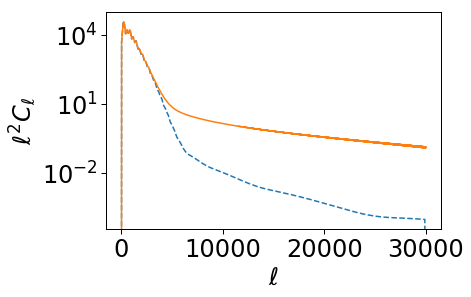

In [22]:
theory_file_root = "../../alhazen/data/Aug6_highAcc_CDM"
theory = cosmology.loadTheorySpectraFromCAMB(theory_file_root,unlensedEqualsLensed=False,useTotal=False,TCMB = 2.7255e6,lpad=30000,get_dimensionless=False) 

lmax = 30000
ells = np.arange(0,lmax,1)
ltt = theory.lCl('TT',ells)
utt = theory.uCl('TT',ells)
pl = io.Plotter(yscale='log',xlabel="$\\ell$",ylabel="$\\ell^2 C_{\\ell}$")
pl.add(ells,utt*ells**2.,ls="--")
pl.add(ells,ltt*ells**2.)
pl.done()


0 0.9999973956473112
500 0.9993174098851787
1000 1.007528858181457
2000 1.0664338951449133


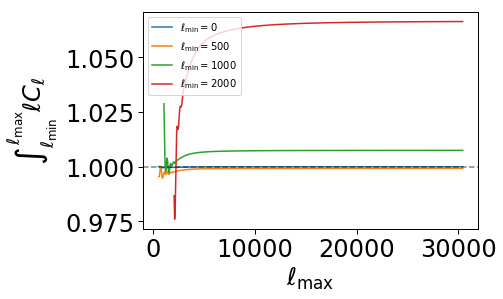

In [32]:
# ratio of lensed to unlensed \int ell C_ell from 0 to lmax
lmaxes = np.arange(500,30500,50)
lmins = [0,500,1000,2000]

pl = io.Plotter(xlabel="$\\ell_{\\mathrm{max}}$",ylabel="$\\int_{\\ell_{\\mathrm{min}}}^{\\ell_{\\mathrm{max}}} \\ell C_{\\ell} $")

for lmin in lmins:
    rats = []
    for lmax in lmaxes:
        ells = np.arange(lmin,lmax,1)
        ltt = theory.lCl('TT',ells)
        utt = theory.uCl('TT',ells)

        rats.append(np.sum(ells*ltt)/np.sum(ells*utt))
    
    pl.add(lmaxes,rats,label="$\\ell_{\\mathrm{min}}="+str(lmin)+"$")
    print(lmin,rats[-1])
pl.hline(y=1.0)
pl.legend()
pl.done()
